In [1]:
using HDF5
using LaTeXStrings
using PyPlot
using DelimitedFiles

In [2]:
# give the directory where the data from all the runs are saved
your_dir = "/home/thanasis/repos/BondiToy/examples/run00"

"/home/thanasis/repos/BondiToy/examples/run00"

In [3]:
# SH model
data_dir_SH = your_dir*"/SH_smooth_B1"

#N=3 the times we doubled from Nx=17 to get this resolution
Nx = 129#17 # the overal course graining
Nz = 128#16
n = 0

# load the x grid
xc = h5read(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/x.h5","x")
dxc = xc[2] - xc[1]
xm = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/x.h5","x")
xh = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/x.h5","x")

# load the θ grid
zc = h5read(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/z.h5","z")
dzc = zc[2] - zc[1]
zm = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/z.h5","z")
zh = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/z.h5","z")

# load all the timesteps that data is writen
#tc = h5read(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/t_out.h5","t_out")
#tm = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/t_out.h5","t_out")
#th = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/t_out.h5","t_out")

tc = readdlm(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/L2_norm.dat", comments=true)[:,1]
tm = readdlm(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/L2_norm.dat", comments=true)[:,1]
th = readdlm(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/L2_norm.dat", comments=true)[:,1]

# create lists to save the common timesteps of the 3 resolutions
tm_c = zeros(length(tc));
th_c = zeros(length(tc));
xm_c = zeros(length(xc));
xh_c = zeros(length(xc));
zm_c = zeros(length(zc));
zh_c = zeros(length(zc));

In [4]:
#i is the timestep of the lowest resolution tc    
i=length(tc)-1

i0 = i
i1 = 2*i0
i2 = 2*i1
it_str_0  = lpad(i0, 4, "0")
it_str_1  = lpad(i1, 4, "0")
it_str_2  = lpad(i2, 4, "0")

       
ψc_SH =  h5read(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/data_$(it_str_0).h5","ψ")
ψm_SH =  h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/data_$(it_str_1).h5","ψ")
ψh_SH =  h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/data_$(it_str_2).h5","ψ")
    
print("$(tc[i0+1]), $(tm[i1+1]), $(th[i2+1]) \n")
   
ψcm_SH = similar(ψc_SH)
ψmh_SH = similar(ψc_SH)

# make sure that we can inject points from the medium and high resolution
# grids in the coarse grid without interpolation
@assert xc ≈ xm[1:2:end] ≈ xh[1:4:end]
@assert zc ≈ zm[1:2:end] ≈ zh[1:4:end]

xm_c = xm[1:2:end] - xc
xh_c = xh[1:4:end] - xc
zm_c = zm[1:2:end] - zc
zh_c = zh[1:4:end] - zc

        
ψcm_SH = ψc_SH - ψm_SH[1:2:end, 1:2:end]
ψmh_SH = ψm_SH[1:2:end, 1:2:end] - ψh_SH[1:4:end, 1:4:end]


1.0, 1.0, 1.0 


129×128 Array{Float64,2}:
 -1.75433e-5  -1.70405e-5  -1.64967e-5  …  -1.84209e-5  -1.80038e-5
 -1.76126e-5  -1.71078e-5  -1.65618e-5     -1.84937e-5  -1.80749e-5
 -1.76819e-5  -1.71751e-5  -1.66269e-5     -1.85667e-5  -1.81461e-5
 -1.77513e-5  -1.72424e-5  -1.6692e-5      -1.86396e-5  -1.82174e-5
 -1.78205e-5  -1.73096e-5  -1.67569e-5     -1.87125e-5  -1.82885e-5
 -1.78896e-5  -1.73765e-5  -1.68217e-5  …  -1.87852e-5  -1.83595e-5
 -1.79581e-5  -1.7443e-5   -1.68859e-5     -1.88574e-5  -1.843e-5  
 -1.80258e-5  -1.75085e-5  -1.69491e-5     -1.89289e-5  -1.84996e-5
 -1.8092e-5   -1.75725e-5  -1.70108e-5     -1.89989e-5  -1.85678e-5
 -1.81556e-5  -1.76339e-5  -1.70697e-5     -1.90666e-5  -1.86336e-5
 -1.82152e-5  -1.76911e-5  -1.71244e-5  …  -1.91306e-5  -1.86954e-5
 -1.82683e-5  -1.77416e-5  -1.71722e-5     -1.91885e-5  -1.8751e-5 
 -1.83114e-5  -1.77818e-5  -1.72094e-5     -1.92371e-5  -1.87969e-5
  ⋮                                     ⋱                          
 -3.56945e-5  -3.42145

In [5]:
# WH model
data_dir_WH = your_dir*"/WH_smooth_B0"

ψc_WH =  h5read(data_dir_WH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/data_$(it_str_0).h5","ψ")
ψm_WH =  h5read(data_dir_WH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/data_$(it_str_1).h5","ψ")
ψh_WH =  h5read(data_dir_WH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/data_$(it_str_2).h5","ψ")
   
ψcm_WH = similar(ψc_WH)
ψmh_WH = similar(ψc_WH)
        
ψcm_WH = ψc_WH - ψm_WH[1:2:end, 1:2:end]
ψmh_WH = ψm_WH[1:2:end, 1:2:end] - ψh_WH[1:4:end, 1:4:end]

129×128 Array{Float64,2}:
  8.09906e-11   8.34525e-11   8.57133e-11  …   7.5488e-11    7.83337e-11
  1.64154e-10   1.69143e-10   1.73725e-10      1.53001e-10   1.58769e-10
  3.10998e-10   3.20453e-10   3.29135e-10      2.89867e-10   3.00795e-10
  5.7292e-10    5.90339e-10   6.06336e-10      5.33986e-10   5.5412e-10 
  1.03664e-9    1.06816e-9    1.09711e-9       9.66176e-10   1.00261e-9 
  1.84773e-9    1.90393e-9    1.95555e-9   …   1.72211e-9    1.78707e-9 
  3.24664e-9    3.34542e-9    3.43614e-9       3.02588e-9    3.14004e-9 
  5.62471e-9    5.79589e-9    5.9531e-9        5.24216e-9    5.43999e-9 
  9.60862e-9    9.90112e-9    1.01698e-8       8.95493e-9    9.29297e-9 
  1.61851e-8    1.66779e-8    1.71306e-8       1.50837e-8    1.56532e-8 
  2.68813e-8    2.77001e-8    2.84523e-8   …   2.50514e-8    2.59977e-8 
  4.40202e-8    4.53616e-8    4.65938e-8       4.10226e-8    4.25727e-8 
  7.10726e-8    7.32394e-8    7.52297e-8       6.62311e-8    6.87346e-8 
  ⋮                      

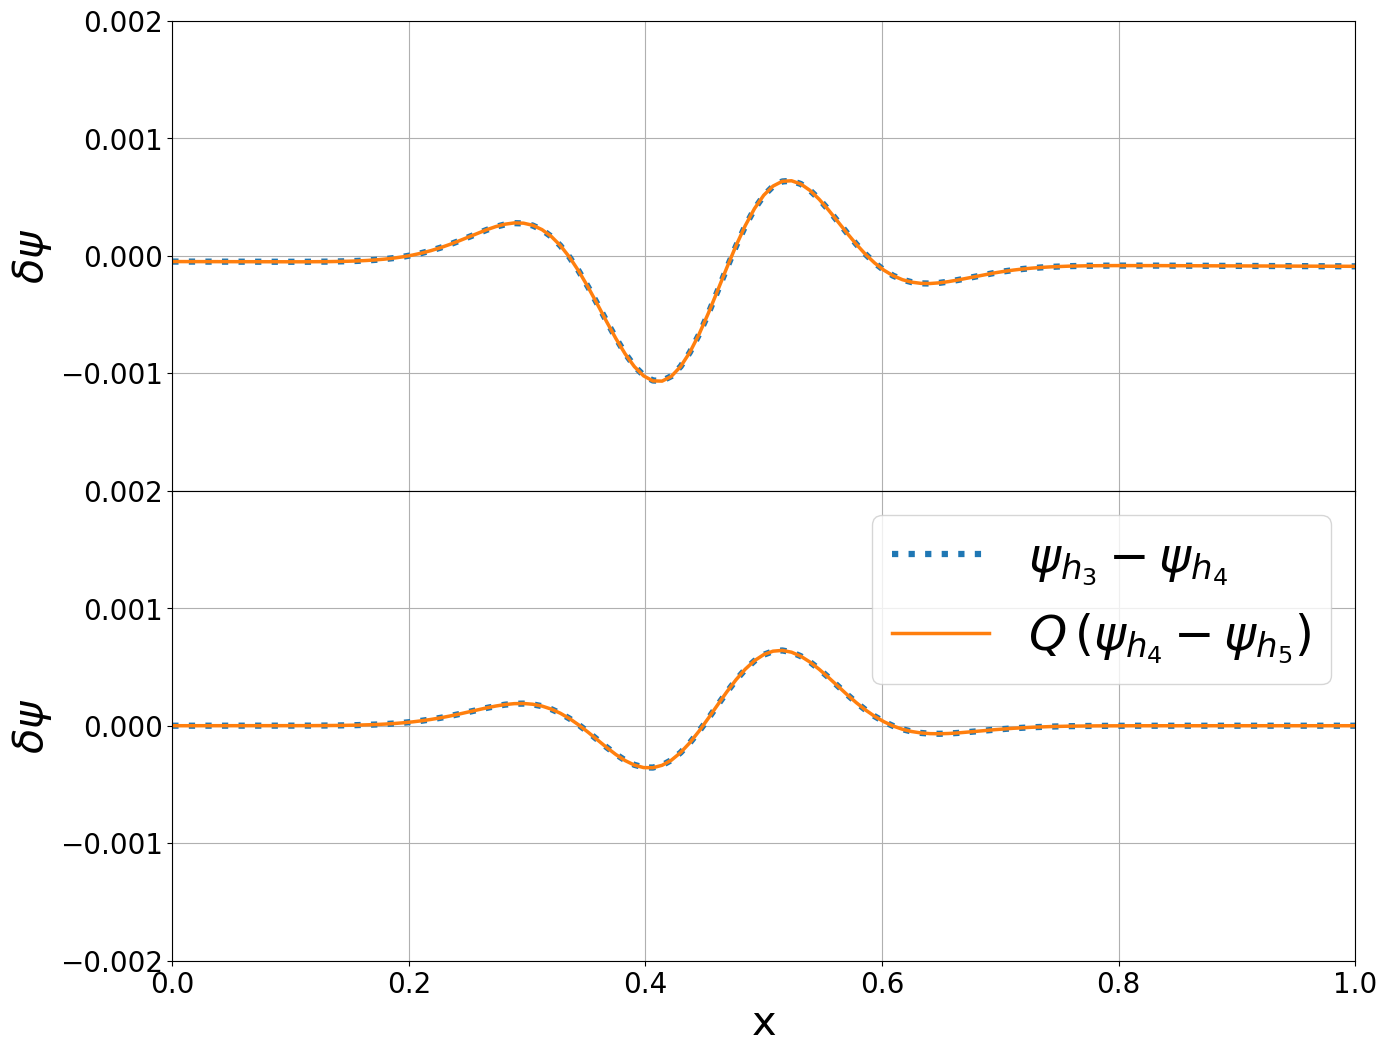

In [6]:
## PLOT for fixed z; not in paper ##
z_index = 9

fig = figure("pyplot_subplot_touching",figsize=(13,10))
subplots_adjust(hspace=0.0, wspace=0.1, top = 0.99, bottom = 0.05, right=0.98, left=0.07)# Set the vertical spacing between axes

subplot(211) # Create the 1st axis of a 3x1 array of axes
ax1 = gca()
setp(ax1.get_xticklabels(),visible=false) # Disable x tick labels
grid("on")
ylabel(L"δψ",fontsize="30")
yticks(-0.001:0.001:0.002,fontsize="20") # Set the y-tick range and step size
ylim(-0.002,0.002) # Set the y-limits
#plot
plot(xc, ψcm_SH[:,z_index], linestyle=":" , linewidth=4.5, label=L"ψ_{h_3}-ψ_{h_4}" )
plot(xc, 4*ψmh_SH[:,z_index], linestyle="-", linewidth=2.5, label=L"Q \, \left(ψ_{h_4}-ψ_{h_5}\right)" )

subplot(212,sharex=ax1) # Create the 2nd axis of a 3x1 array of axes

ax2 = gca()
setp(ax2.get_xticklabels(),visible=true) # Disable x tick labels
grid("on")
# x-axis
xlim(0.0,1.0) # Set the x-limits
xticks(0.0:0.2:1.0,fontsize="20") # Set the x-tick range and step size
xlabel("x",fontsize="30")
#y-axis
ylabel(L"δψ",fontsize="30")
yticks(-0.002:0.001:0.002,fontsize="20") # Set the y-tick range and step size
ylim(-0.002,0.002) # Set the y-limits
#plot
plot(xc, ψcm_WH[:,33], linestyle=":" , linewidth=4.5, label=L"ψ_{h_3}-ψ_{h_4}")
plot(xc, 4*ψmh_WH[:,33], linestyle="-", linewidth=2.5, label=L"Q \, \left(ψ_{h_4}-ψ_{h_5}\right)")

legend(fontsize="35")

fig.canvas.draw() # Update the figure

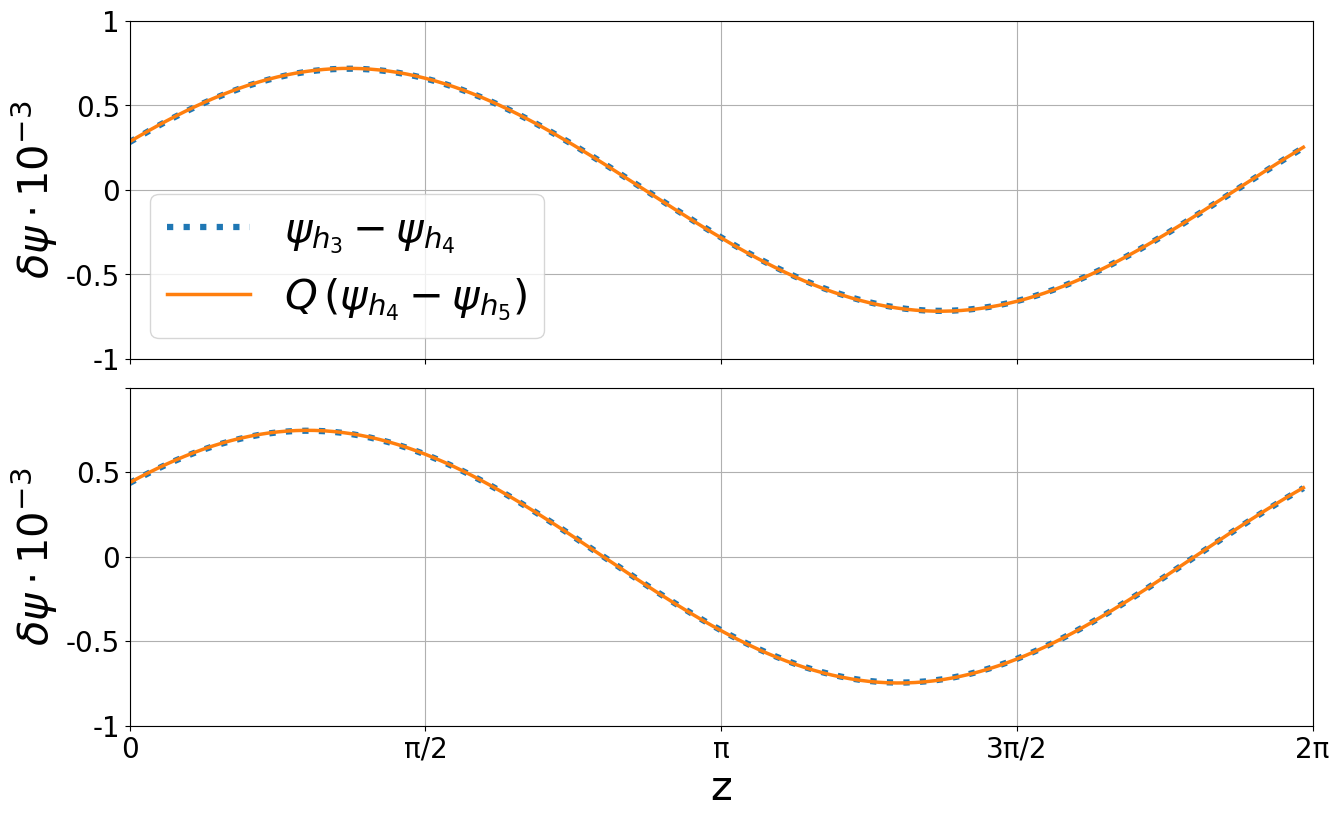

In [7]:
## PLOT for fixed x; see figure 6 of the paper ##

fig = figure("pyplot_subplot_touching",figsize=(13,7.5))
subplots_adjust(hspace=0.085, wspace=0.0, top = 0.99, bottom = 0.05, right=0.98, left=0.07)

subplot(211) # Create the 1st axis of a 3x1 array of axes
ax1 = gca()
setp(ax1.get_xticklabels(),visible=false) # Disable x tick labels
grid("on")
ylabel(L"δψ \cdot 10^{-3}",fontsize="30")
yticks(-0.001:0.0005:0.001,fontsize="20",["-1","-0.5","0","0.5","1"]) # Set the y-tick range and step size
ylim(-0.001,0.001) # Set the y-limits
#plot
plot(zc, ψcm_SH[65,:], linestyle=":" , linewidth=4.5, label=L"ψ_{h_3}-ψ_{h_4}")
plot(zc, 4*ψmh_SH[65,:], linestyle="-", linewidth=2.5, label=L"Q \, \left(ψ_{h_4}-ψ_{h_5}\right)" )

legend(fontsize="30")

subplot(212,sharex=ax1) # Create the 2nd axis of a 3x1 array of axes

ax2 = gca()
setp(ax2.get_xticklabels(),visible=true) # Disable x tick labels
grid("on")
# x-axis
xlim(0.0,2.0*π) # Set the x-limits
xticks(0.0:π/2:2.0*π,fontsize="20",["0","π/2","π","3π/2","2π"]) # Set the x-tick range and step size
xlabel("z", fontsize="30")#fontname="arial" 
#y-axis
ylabel(L"δψ \cdot 10^{-3}",fontsize="30")
yticks(-0.001:0.0005:0.001,fontsize="20",["-1","-0.5","0","0.5"]) # Set the y-tick range and step size
ylim(-0.001,0.001) # Set the y-limits
#plot
plot(zc, ψcm_WH[65,:], linestyle=":" , linewidth=4.5, label=L"ψ_{h_3}-ψ_{h_4}")
plot(zc, 4*ψmh_WH[65,:], linestyle="-", linewidth=2.5, label=L"Q \, \left(ψ_{h_4}-ψ_{h_5}\right)")

fig.canvas.draw() # Update the figure